In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
data=pd.read_csv('application_record.csv')
records=pd.read_csv('credit_record.csv')

In [104]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [105]:
records.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [106]:
data.shape

(438557, 18)

In [107]:
records.shape

(1048575, 3)

In [108]:
a=len(data.ID.unique())

In [109]:
b=len(data.ID)

In [110]:
#duplicates rows IDs in data
b-a

47

In [111]:
c=len(records.ID.unique())

In [112]:
d=len(records.ID)

In [113]:
#Duplicate IDs in records
d-c

1002590

In [114]:
data = data.drop_duplicates(subset = 'ID', keep = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   CODE_GENDER          438463 non-null  object 
 2   FLAG_OWN_CAR         438463 non-null  object 
 3   FLAG_OWN_REALTY      438463 non-null  object 
 4   CNT_CHILDREN         438463 non-null  int64  
 5   AMT_INCOME_TOTAL     438463 non-null  float64
 6   NAME_INCOME_TYPE     438463 non-null  object 
 7   NAME_EDUCATION_TYPE  438463 non-null  object 
 8   NAME_FAMILY_STATUS   438463 non-null  object 
 9   NAME_HOUSING_TYPE    438463 non-null  object 
 10  DAYS_BIRTH           438463 non-null  int64  
 11  DAYS_EMPLOYED        438463 non-null  int64  
 12  FLAG_MOBIL           438463 non-null  int64  
 13  FLAG_WORK_PHONE      438463 non-null  int64  
 14  FLAG_PHONE           438463 non-null  int64  
 15  FLAG_EMAIL       

In [115]:
print("No. of unique IDs that are consistent between both datasets", data[data['ID'].isin(records['ID'])]['ID'].nunique())
data = data[data['ID'].isin(records['ID'])]
records = records[records['ID'].isin(data['ID'])]
print("New No. of IDs in application_record", data['ID'].nunique())
print("New No. of IDs in credit_record", records['ID'].nunique())

No. of unique IDs that are consistent between both datasets 36457
New No. of IDs in application_record 36457
New No. of IDs in credit_record 36457


In [116]:
data = data.drop(columns=['CODE_GENDER', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH'])

In [117]:
def determine_approval(df):
    if(df['STATUS'] == 'X'): return -1
    elif(df['STATUS'] == '1' or df['STATUS'] == '2' or df['STATUS'] == '3' or df['STATUS'] == '4' or df['STATUS'] == '5'): return 0
    elif(df['STATUS'] == 'C' or df['STATUS'] == '0'): return 1

In [118]:
records['APPROVED'] = records.apply(determine_approval, axis=1)
records = records[records['APPROVED']!=-1]
records['STATUS'].value_counts()

C    329536
0    290654
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [119]:
data = data.merge(records, on='ID')
data.head(10)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,APPROVED
0,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,0,C,1
1,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-1,C,1
2,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-2,C,1
3,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-3,C,1
4,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-4,C,1
5,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-5,C,1
6,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-6,C,1
7,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-7,C,1
8,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-8,C,1
9,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542,1,1,0,0,NaN,2.0,-9,C,1


In [120]:
data = data[data['MONTHS_BALANCE']==-4]

Text(0.5, 1.0, 'Income types for those with no stated occupation')

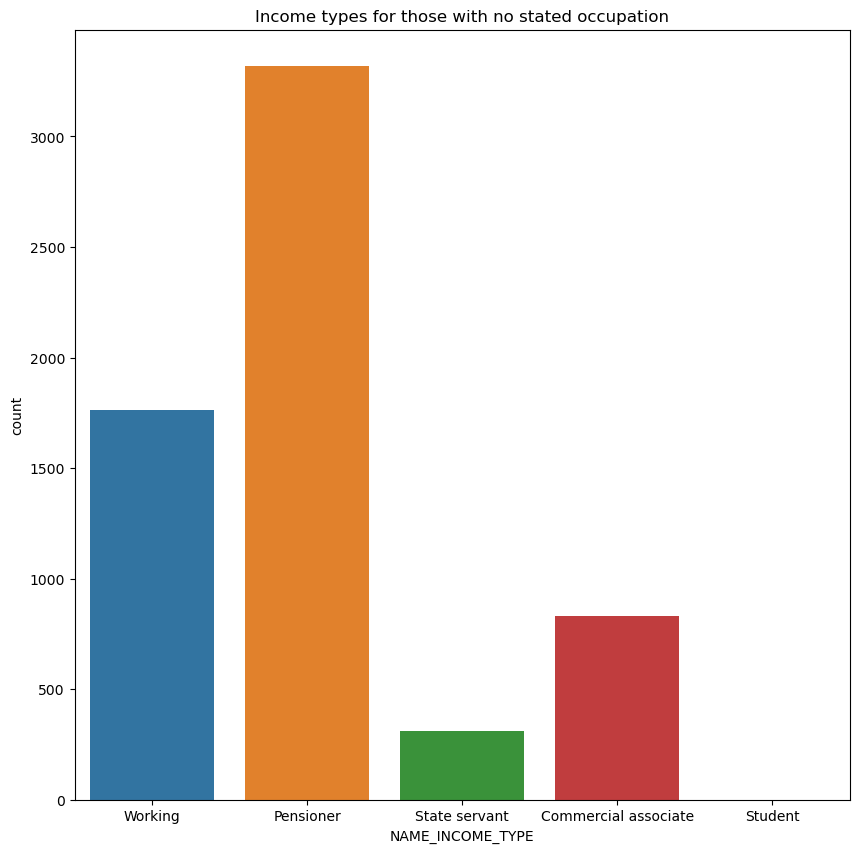

In [121]:
plt.figure(figsize=(10,10))
sns.countplot(x= data[data["OCCUPATION_TYPE"].isna()]["NAME_INCOME_TYPE"])
plt.title("Income types for those with no stated occupation")

In [122]:
data.loc[data["NAME_INCOME_TYPE"]=="Pensioner","OCCUPATION_TYPE"] = "Pension"
data.loc[data["NAME_INCOME_TYPE"]=="Commercial associate","OCCUPATION_TYPE"] = "Commercial associate"
data.loc[data["NAME_INCOME_TYPE"]=="State servant","OCCUPATION_TYPE"] = "State servant"
data.loc[data["NAME_INCOME_TYPE"]=="Student","OCCUPATION_TYPE"] = "Student"
data = data.dropna()
data.isna().sum()

ID                     0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
APPROVED               0
dtype: int64

In [123]:
print(data[data['DAYS_EMPLOYED'] > 50000].count()) 
#its impossible for someone to have over 50000 days of employment. Thats over 270 years, so we will drop all these values
data = data.drop(data[data['DAYS_EMPLOYED']>100000].index)
data = data.drop(columns=['STATUS']) #we dont need the status column anymore so we can drop it

ID                     3313
FLAG_OWN_CAR           3313
FLAG_OWN_REALTY        3313
CNT_CHILDREN           3313
AMT_INCOME_TOTAL       3313
NAME_INCOME_TYPE       3313
NAME_EDUCATION_TYPE    3313
NAME_HOUSING_TYPE      3313
DAYS_EMPLOYED          3313
FLAG_MOBIL             3313
FLAG_WORK_PHONE        3313
FLAG_PHONE             3313
FLAG_EMAIL             3313
OCCUPATION_TYPE        3313
CNT_FAM_MEMBERS        3313
MONTHS_BALANCE         3313
STATUS                 3313
APPROVED               3313
dtype: int64


In [124]:
categorical_columns = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
categorical_df = data[categorical_columns]
categorical_df = categorical_df.apply(lambda x: pd.factorize(x)[0])
categorical_df = pd.DataFrame(categorical_df)
data[categorical_columns] = categorical_df
print(data['APPROVED'].value_counts())
data.head()

1    14693
0      300
Name: APPROVED, dtype: int64


,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,APPROVED
33,5008806,0,0,0,112500.0,0,0,0,-1134,1,0,0,0,0,2.0,-4,1
49,5008810,1,0,0,270000.0,1,0,0,-3051,1,0,1,1,1,1.0,-4,1
70,5008811,1,0,0,270000.0,1,0,0,-3051,1,0,1,1,1,1.0,-4,1
145,5008815,0,0,0,270000.0,0,1,0,-769,1,1,1,1,2,2.0,-4,1
148,5112956,0,0,0,270000.0,0,1,0,-769,1,1,1,1,2,2.0,-4,1


In [125]:
X = data.drop(['APPROVED', 'ID'], axis = 1) 
Y = data['APPROVED']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 101)

# LOGISTIC REGRESSION

In [127]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [128]:
lr = LogisticRegression(random_state = 101)
lr.fit(X_train, y_train)

LogisticRegression(random_state=101)

In [129]:
y_pred = lr.predict(X_test)

In [130]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

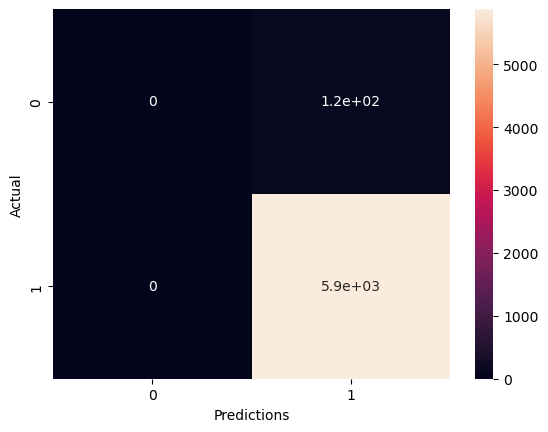

In [131]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.98      1.00      0.99      5876

    accuracy                           0.98      5998
   macro avg       0.49      0.50      0.49      5998
weighted avg       0.96      0.98      0.97      5998



C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

In [133]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.14      0.07      0.09       122
           1       0.98      0.99      0.99      5876

    accuracy                           0.97      5998
   macro avg       0.56      0.53      0.54      5998
weighted avg       0.96      0.97      0.97      5998



Text(50.722222222222214, 0.5, 'Actual')

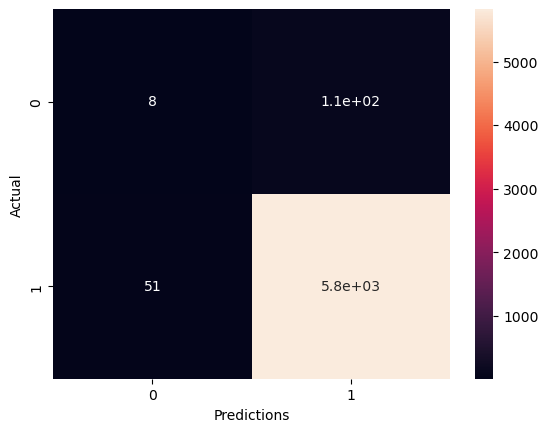

In [134]:
cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')

# KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

model_KNN.fit(X_train,y_train)

Y_pred=model_KNN.predict(X_test)

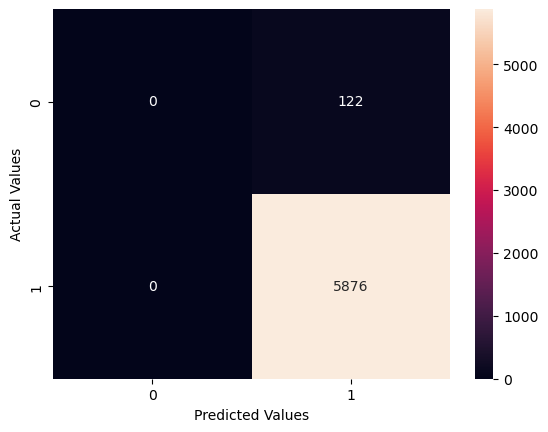

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.98      1.00      0.99      5876

    accuracy                           0.98      5998
   macro avg       0.49      0.50      0.49      5998
weighted avg       0.96      0.98      0.97      5998



C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
cfm=metrics.confusion_matrix(y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print(classification_report(y_test,Y_pred))



# SVC 

In [137]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train,y_train)
#predicting the test set results
Y_pred = classifier.predict(X_test)

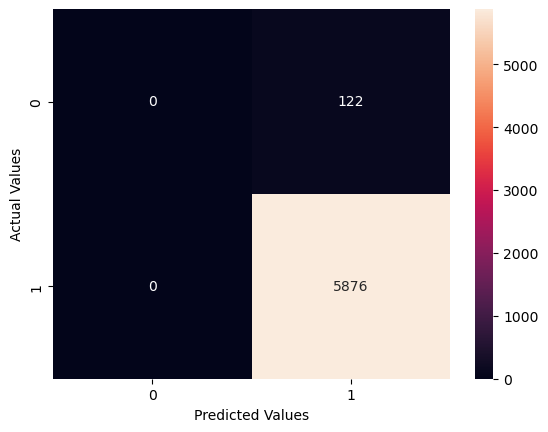

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.98      1.00      0.99      5876

    accuracy                           0.98      5998
   macro avg       0.49      0.50      0.49      5998
weighted avg       0.96      0.98      0.97      5998



C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
cfm=metrics.confusion_matrix(y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test,Y_pred))

# Decision Trees

In [139]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",random_state=101)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,y_train)
Y_pred=model_DecisionTree.predict(X_test)

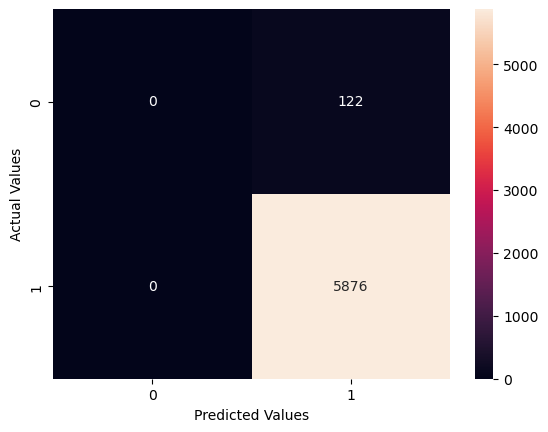

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.98      1.00      0.99      5876

    accuracy                           0.98      5998
   macro avg       0.49      0.50      0.49      5998
weighted avg       0.96      0.98      0.97      5998



C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g' )
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print(classification_report(y_test,Y_pred))


#  Extra Trees Classifier

In [141]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=101)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train,y_train)

Y_pred = model_ExtraTrees.predict(X_test)

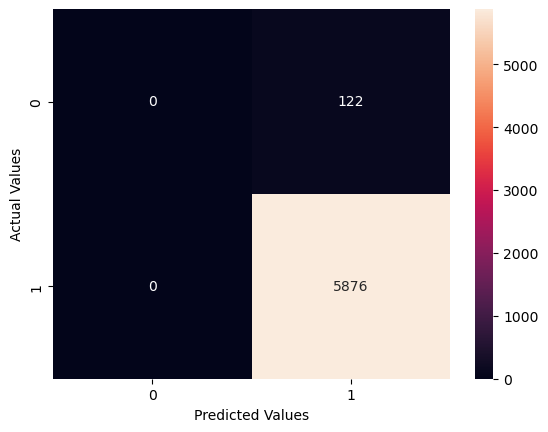

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.98      1.00      0.99      5876

    accuracy                           0.98      5998
   macro avg       0.49      0.50      0.49      5998
weighted avg       0.96      0.98      0.97      5998



C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(y_test,Y_pred))

 #  XGBOOST

In [143]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [144]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=100,
                              random_state=101)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,y_train)

Y_pred=model_XGBoost.predict(X_test)

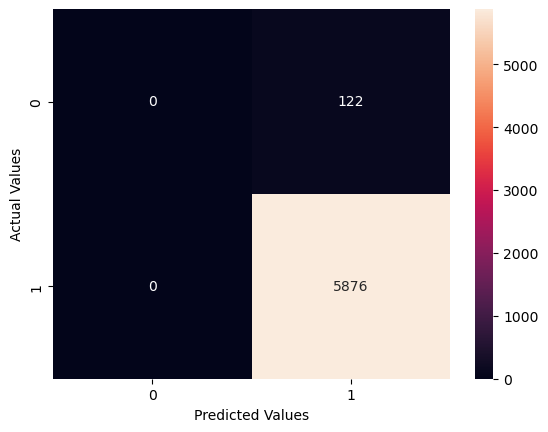

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.98      1.00      0.99      5876

    accuracy                           0.98      5998
   macro avg       0.49      0.50      0.49      5998
weighted avg       0.96      0.98      0.97      5998



C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print(classification_report(y_test,Y_pred))

#  ADABOOST

In [146]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=101),
                                  n_estimators=100,
                              random_state=101)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,y_train)

Y_pred=model_AdaBoost.predict(X_test)

C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


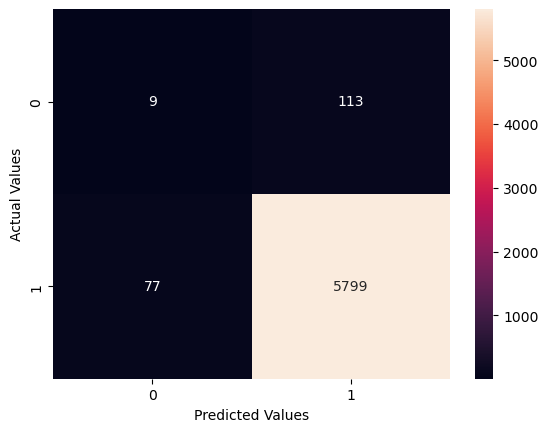

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.98      1.00      0.99      5876

    accuracy                           0.98      5998
   macro avg       0.49      0.50      0.49      5998
weighted avg       0.96      0.98      0.97      5998



C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print(classification_report(y_test,y_pred))

#  Light Gradient Boosting

In [148]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
from lightgbm import LGBMClassifier

In [150]:
lgbm=LGBMClassifier(n_estimators=100,learning_rate=0.01,random_state=101)
lgbm.fit(X_train,y_train)
Y_pred=lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 8817, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 8995, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.980211 -> initscore=3.902653
[LightGBM] [Info] Start training from score 3.902653


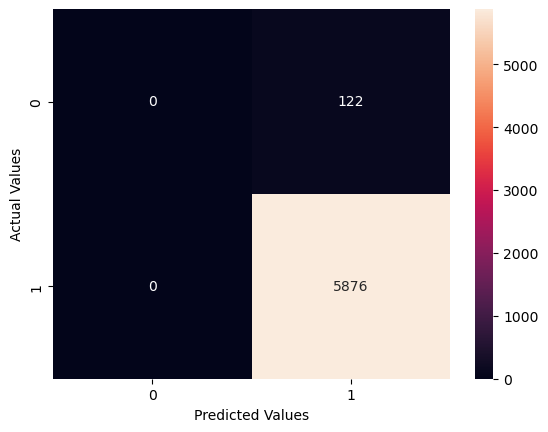

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.98      1.00      0.99      5876

    accuracy                           0.98      5998
   macro avg       0.49      0.50      0.49      5998
weighted avg       0.96      0.98      0.97      5998



C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print(classification_report(y_test,y_pred))

# CAT BOOST

In [152]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
from catboost import CatBoostClassifier
cb=CatBoostClassifier(iterations=100,learning_rate=0.01,random_state=101)
cb.fit(X_train,y_train)
Y_pred=lgbm.predict(X_test)

0:	learn: 0.6841304	total: 2.5ms	remaining: 247ms
1:	learn: 0.6753169	total: 5.01ms	remaining: 246ms
2:	learn: 0.6666636	total: 7.4ms	remaining: 239ms
3:	learn: 0.6581773	total: 9.72ms	remaining: 233ms
4:	learn: 0.6497240	total: 11.5ms	remaining: 219ms
5:	learn: 0.6414671	total: 13.7ms	remaining: 214ms
6:	learn: 0.6333575	total: 15.4ms	remaining: 205ms
7:	learn: 0.6255343	total: 17.7ms	remaining: 203ms
8:	learn: 0.6177113	total: 20ms	remaining: 202ms
9:	learn: 0.6101086	total: 21.9ms	remaining: 197ms
10:	learn: 0.6027197	total: 24.4ms	remaining: 197ms
11:	learn: 0.5952867	total: 26.8ms	remaining: 197ms
12:	learn: 0.5880901	total: 29.3ms	remaining: 196ms
13:	learn: 0.5810154	total: 31.4ms	remaining: 193ms
14:	learn: 0.5739889	total: 33.5ms	remaining: 190ms
15:	learn: 0.5671326	total: 35.7ms	remaining: 188ms
16:	learn: 0.5603946	total: 37.9ms	remaining: 185ms
17:	learn: 0.5537464	total: 40.2ms	remaining: 183ms
18:	learn: 0.5472890	total: 42.5ms	remaining: 181ms
19:	learn: 0.5408413	total

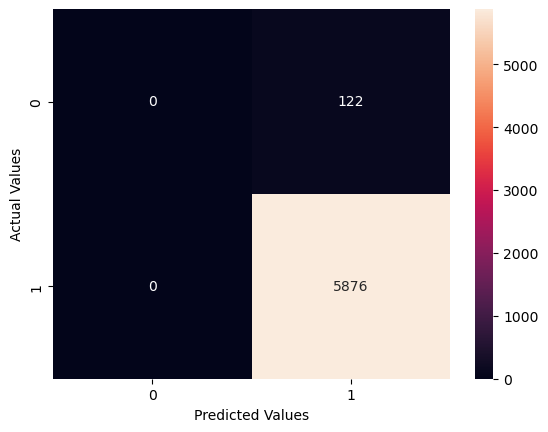

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.98      1.00      0.99      5876

    accuracy                           0.98      5998
   macro avg       0.49      0.50      0.49      5998
weighted avg       0.96      0.98      0.97      5998



C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssw10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print(classification_report(y_test,y_pred))